In [1]:
from imports import *

pd.options.display.max_columns = 100

In [2]:
df = pd.read_csv("cleaned_data/cleaned_wvs_data.csv")

Find the summary table of the numeric features below. The sample includes 89 countries over 3 time periods. GDP per capita is in constant 2010 US dollars. The Democracy Index ranges from 0 (least democratic) to 10 (most democratic). The Human Development Index ranges from 0 (least developed) to 1 (most developed). Work ethic, trust, equality and religion are standardized indices ranging from 1-5. 

In [6]:
df["gdp_per_capita_std"]

0     -0.002063
1     -0.002063
2     -0.002063
3     -0.472020
4     -0.472020
         ...   
262   -0.659186
263   -0.659186
264   -0.647522
265   -0.647522
266   -0.651544
Name: gdp_per_capita_std, Length: 267, dtype: float64

In [3]:
# Create numeric summary statistics
summary = pd.DataFrame()

numeric_vars = ['democracy_score', 'work_ethic', 'trust', 
               'equality', 'religion', 'gdp_per_capita', 'hdi']

for var in numeric_vars:
    stats = pd.Series({
        'Count': df[var].count().round(0),
        'Mean': df[var].mean().round(2),
        'Std Dev': df[var].std().round(2),
        'Min': df[var].min().round(2),
        '25%': df[var].quantile(0.25).round(2),
        'Median': df[var].median().round(2),
        '75%': df[var].quantile(0.75).round(2),
        'Max': df[var].max(),
        'Missing': df[var].isna().sum(),
        'Missing %': (df[var].isna().sum() / len(df[var])) * 100
    }).round(3)
    
    summary[var] = stats
    
# Print categorical summary
print("\nDataset Overview:")
print("-----------------")
print(f"Number of Columns: {df.shape[1]}")
print(f"Number of Countries: {len(df["country"].unique())}")
print(f"Number of Periods: 3")
print(f"Total Observations: {df.shape[0]}")

# Display the styled table
display(summary)


Dataset Overview:
-----------------
Number of Columns: 42
Number of Countries: 89
Number of Periods: 3
Total Observations: 267


,democracy_score,work_ethic,trust,equality,religion,gdp_per_capita,hdi
Count,267.00,267.000,267.000,267.000,267.000,267.000,267.000
Mean,5.87,1.680,2.410,2.160,3.210,16021.720,0.750
Std Dev,2.08,0.270,0.240,0.170,0.340,19686.670,0.140
Min,1.74,1.010,1.430,1.580,2.090,240.350,0.340
25%,3.92,1.510,2.290,2.040,3.010,2587.180,0.680
Median,6.03,1.680,2.440,2.180,3.210,6527.660,0.760
75%,7.60,1.830,2.560,2.270,3.440,22179.360,0.860
Max,9.66,2.712,2.931,2.726,4.203,85502.268,0.949
Missing,0.00,0.000,0.000,0.000,0.000,0.000,0.000
Missing %,0.00,0.000,0.000,0.000,0.000,0.000,0.000


The following violinplots show the distribution of each score --- trust, work ethic, equality, and religion --- when cut into income, human development index, and democracy index, quartiles. This plot yields several interesting conclusions:

1) Across all cuts, there appears to be a pretty uniform trend in mean score, either upward or downward. This suggests that the scores are quite correlated with income, human development, and democracy.

2) Most scores increase, on average, as income, HDI, and democracy increase. But trust seems to _decrease_! This is fascinating, and generates several new questions about the dataset. 

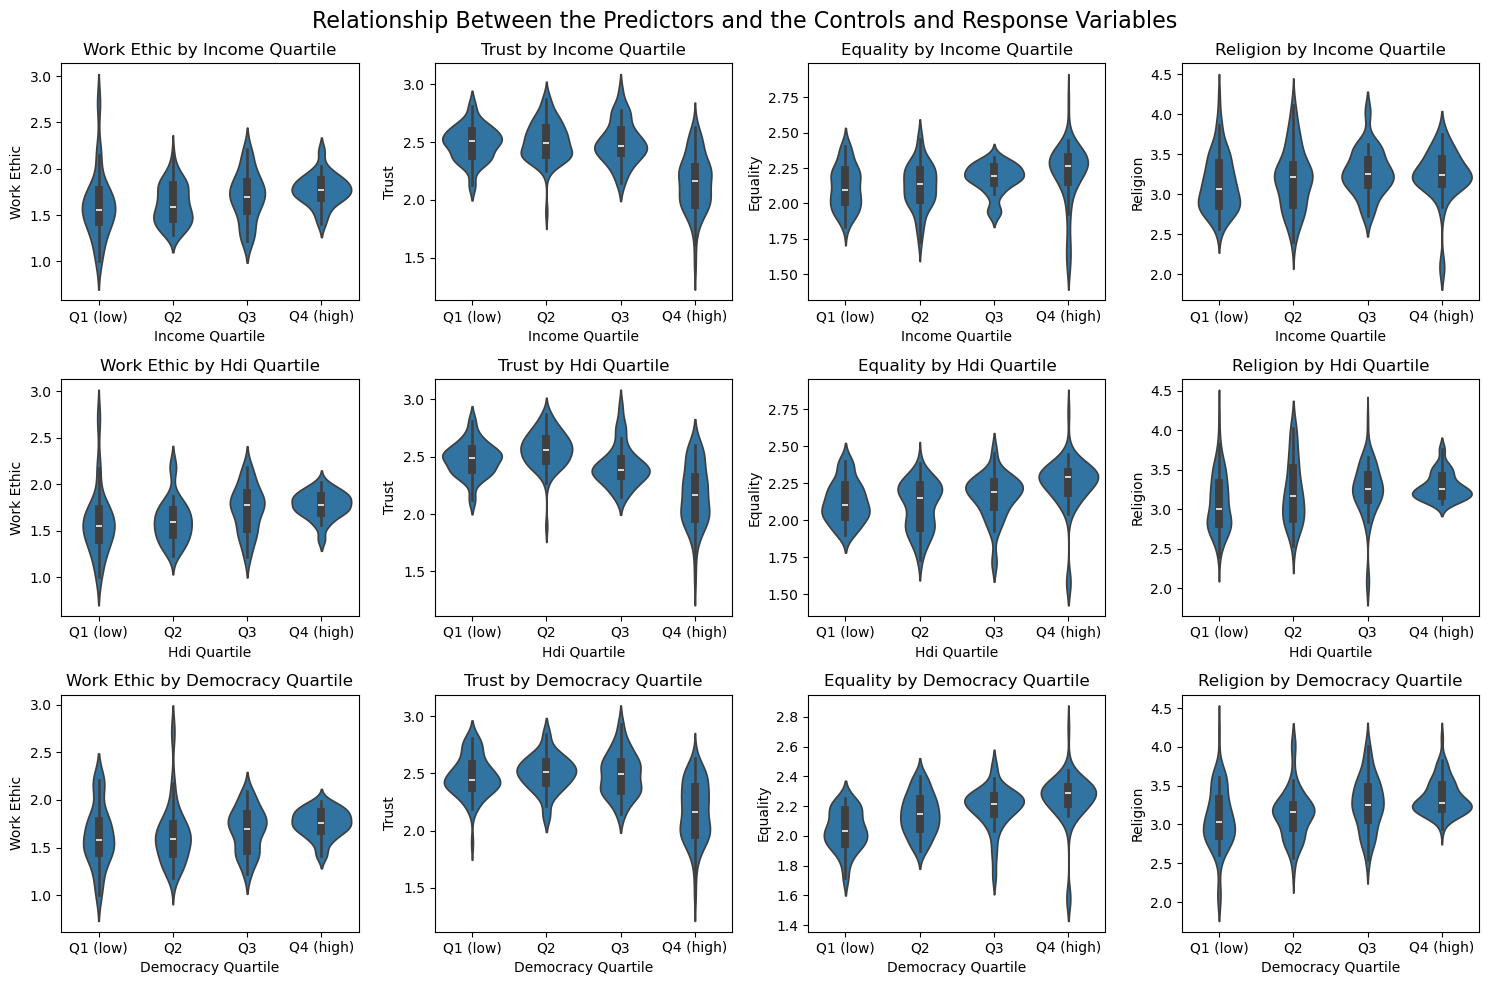

In [7]:
# create income quartiles
df['income_quartile'] = pd.qcut(df['gdp_per_capita'], q=4, labels=['Q1 (low)', 'Q2', 'Q3', 'Q4 (high)'])

# create HDI buckets
df['hdi_quartile'] = pd.qcut(df['hdi'], q=4, labels=['Q1 (low)', 'Q2', 'Q3', 'Q4 (high)'])

# create Democracy buckets
df['democracy_quartile'] = pd.qcut(df['democracy_score'], q=4, labels=['Q1 (low)', 'Q2', 'Q3', 'Q4 (high)'])

# create boxplots
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle('Relationship Between the Predictors and the Controls and Response Variables', fontsize=16)

cuts = ["income_quartile", "hdi_quartile", "democracy_quartile"]
scores = ["work_ethic", "trust", "equality", "religion"]

for i, cut in enumerate(cuts):
    for j, predictor in enumerate(scores):
        sns.violinplot(data=df, x=cut, y=predictor, ax=axes[i, j])
        
        # fix labelling
        x_name = cut.replace('_', ' ').title() 
        y_name = predictor.replace('_', ' ').title()
        axes[i, j].set_title(f"{y_name} by {x_name}")
        axes[i, j].set_xlabel(f"{x_name}")
        axes[i, j].set_ylabel(f"{y_name}")

plt.tight_layout()
plt.savefig('figures/boxplots.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()